In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

from Corrfunc import mocks
from Corrfunc.utils import convert_rp_pi_counts_to_wp
from scipy import constants
from scipy import stats
import scipy.interpolate as interp
import matplotlib.gridspec as gridspec
from astropy.cosmology import FlatLambdaCDM
import astropy.cosmology.units as cu
import astropy.units as u
from astropy.io import fits

In [2]:
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 18

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
cmap_map = 'plasma'

# Load data from local machine

In [93]:
fn_gcatlo = f'../data/quaia_G20.0.fits'
fn_gcathi = f'../data/quaia_G20.5.fits'

fn_gcatlo_new = f'../Quaia_mock_catalogs-20250211T213139Z-001/Quaia_mock_catalogs/G20/mock_catalog_quaia_G20_real1.fits'
fn_gcathi_new = f'../Quaia_mock_catalogs-20250211T213139Z-001/Quaia_mock_catalogs/G20.5/mock_catalog_quaia_G20.5_real1.fits'

fn_gcatlo_old = f'../Quaia_mock_catalogs-20250211T213139Z-001/Quaia_mock_catalogs/old/mock2/mock_catalog_quaia_nosel_G20.fits'
fn_gcathi_old = f'../Quaia_mock_catalogs-20250211T213139Z-001/Quaia_mock_catalogs/old/mock2/mock_catalog_quaia_nosel_G20.5.fits'

fn_randlo = f'../data/randoms/random_G20.0_10x.fits'
fn_randhi = f'../data/randoms/random_G20.5_10x.fits'

In [94]:
fn_sello = f'../data/maps/selection_function_NSIDE64_G20.0.fits'
fn_selhi = f'../data/maps/selection_function_NSIDE64_G20.5.fits'

## Parameters

In [95]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [96]:
name_catalog = '$Gaia$-$unWISE$ Quasar Catalog'
abbrv_catalog = 'Quaia'

In [97]:
G_hi = 20.5
G_lo = 20.0

In [98]:
# for plotting purposes
fac_stdev = 1.5

## Quasar mock catalog

In [99]:
tab_gcatlo = Table.read(fn_gcatlo)
N_gcatlo = len(tab_gcatlo)
print(f"Number of data sources: {N_gcatlo}")

Number of data sources: 755850


In [100]:
print(tab_gcatlo.meta)

OrderedDict([('NAME', '\\emph{{Gaia}}--\\emph{{unWISE}} Quasar Catalog'), ('ABBRV', 'Quaia')])


In [101]:
print(f"Column names: {tab_gcatlo.columns}")

Column names: <TableColumns names=('source_id','unwise_objid','redshift_quaia','redshift_quaia_err','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','mag_w1_vg','mag_w2_vg','pm','pmra','pmdec','pmra_error','pmdec_error')>


In [102]:
tab_gcathi = Table.read(fn_gcathi)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


### Mocks

In [103]:
tab_gcatlo_old = Table.read(fn_gcatlo_old)
N_gcatlo_old = len(tab_gcatlo_old)
print(f"Number of data sources: {N_gcatlo_old}")

Number of data sources: 759852


In [105]:
tab_gcathi_old = Table.read(fn_gcathi_old)
N_gcathi_old = len(tab_gcathi_old)
print(f"Number of data sources: {N_gcathi_old}")

Number of data sources: 1300677


In [104]:
tab_gcatlo_new = Table.read(fn_gcatlo_new)
N_gcatlo_new = len(tab_gcatlo_new)
print(f"Number of data sources: {N_gcatlo_new}")

Number of data sources: 756534


In [106]:
tab_gcathi_new = Table.read(fn_gcathi_new)
N_gcathi_new = len(tab_gcathi_new)
print(f"Number of data sources: {N_gcathi_new}")

Number of data sources: 1296437


### Make map of quasar number counts

In [25]:
pixel_indices_gcatlo = hp.ang2pix(NSIDE, tab_gcatlo['ra'], tab_gcatlo['dec'], lonlat=True)
map_gcatlo = np.bincount(pixel_indices_gcatlo, minlength=NPIX)

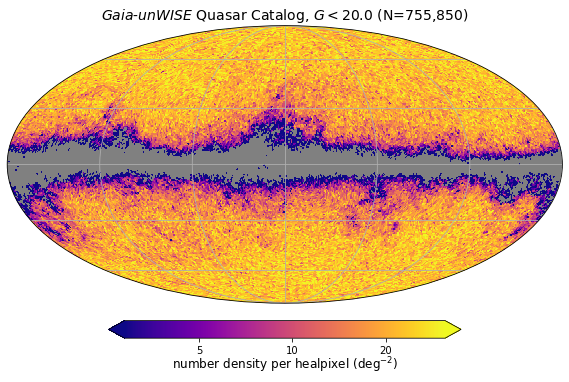

In [26]:
title_gcatlo = rf"{name_catalog}, $G<{G_lo}$ (N={len(tab_gcatlo):,})"
projview(map_gcatlo, title=title_gcatlo,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcatlo)-fac_stdev*np.std(map_gcatlo), max=np.median(map_gcatlo)+fac_stdev*np.std(map_gcatlo), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [27]:
pixel_indices_gcathi = hp.ang2pix(NSIDE, tab_gcathi['ra'], tab_gcathi['dec'], lonlat=True)
map_gcathi = np.bincount(pixel_indices_gcathi, minlength=NPIX)

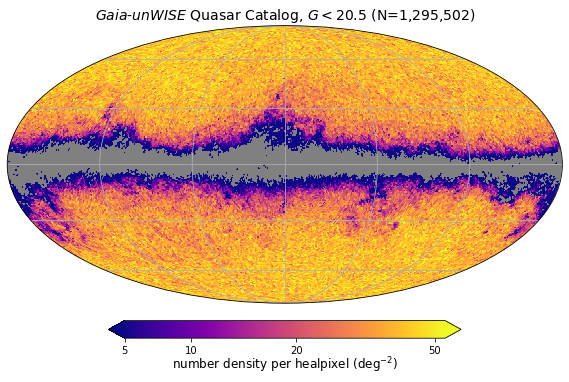

In [28]:
title_gcathi = rf"{name_catalog}, $G<{G_hi}$ (N={len(tab_gcathi):,})"
projview(map_gcathi, title=title_gcathi,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi)-fac_stdev*np.std(map_gcathi), max=np.median(map_gcathi)+fac_stdev*np.std(map_gcathi), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50])

## Random catalog

In [29]:
tab_randlo = Table.read(fn_randlo)
N_randlo = len(tab_randlo)
print(f"Number of random sources: {N_randlo}")

Number of random sources: 7563151


In [30]:
print(f"Column names: {tab_randlo.columns}")

Column names: <TableColumns names=('ra','dec','ebv')>


In [31]:
tab_randhi = Table.read(fn_randhi)
N_randhi = len(tab_randhi)
print(f"Number of random sources: {N_randhi}")

Number of random sources: 12955802


### Make maps of random number counts

In [32]:
pixel_indices_randlo = hp.ang2pix(NSIDE, tab_randlo['ra'], tab_randlo['dec'], lonlat=True)
map_randlo = np.bincount(pixel_indices_randlo, minlength=NPIX)

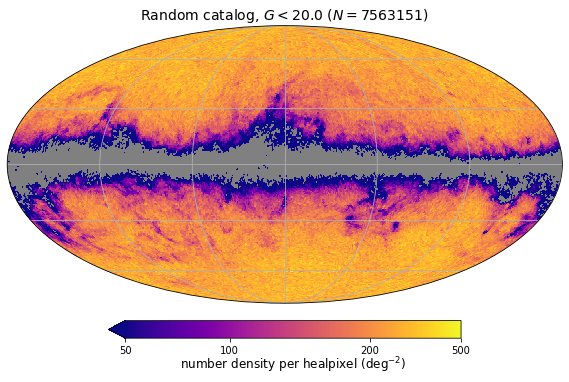

In [33]:
projview(map_randlo, title=rf"Random catalog, $G<{G_lo}$ ($N={N_randlo}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randlo)-fac_stdev*np.std(map_randlo), 
            max=np.median(map_randlo)+fac_stdev*np.std(map_randlo), 
            norm='log', graticule=True,
            cbar_ticks=[50, 100, 200, 500]) 

In [34]:
pixel_indices_randhi = hp.ang2pix(NSIDE, tab_randhi['ra'], tab_randhi['dec'], lonlat=True)
map_randhi = np.bincount(pixel_indices_randhi, minlength=NPIX)

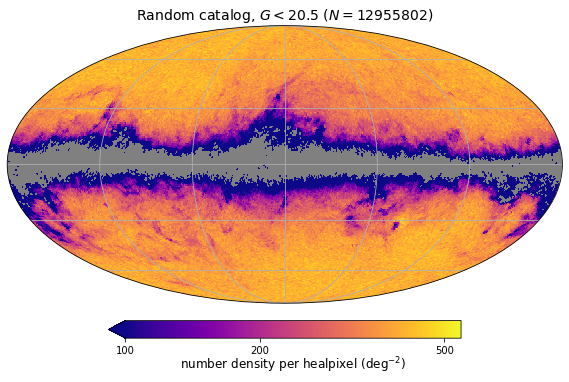

In [35]:
projview(map_randhi, title=rf"Random catalog, $G<{G_hi}$ ($N={N_randhi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randhi)-fac_stdev*np.std(map_randhi), max=np.median(map_randhi)+fac_stdev*np.std(map_randhi), 
            norm='log', graticule=True,
            cbar_ticks=[100, 200, 500]) 

## Remove the selection function
### Start with data catalogs

In [36]:
selfunc_lo = hp.fitsfunc.read_map(fn_sello)

In [37]:
map_selfunc_lo = map_gcatlo/selfunc_lo

<ipython-input-37-22c4d4b7cd3d>:1: RuntimeWarning: invalid value encountered in true_divide
  map_selfunc_lo = map_gcatlo/selfunc_lo


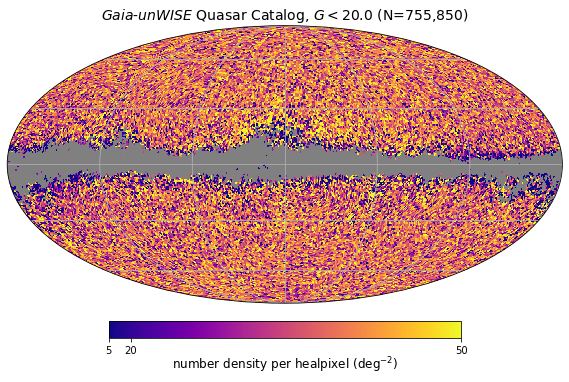

In [38]:
title_gcatlo = rf"{name_catalog}, $G<{G_lo}$ (N={len(tab_gcatlo):,})"
projview(map_selfunc_lo, title=title_gcatlo,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.nanmedian(map_selfunc_lo)-fac_stdev*np.nanstd(map_selfunc_lo), max=np.nanmedian(map_selfunc_lo)+fac_stdev*np.nanstd(map_selfunc_lo), 
            norm='log', graticule=True,
            cbar_ticks=[5, 20, 50]) 

In [39]:
selfunc_hi = hp.fitsfunc.read_map(fn_selhi)

In [40]:
map_selfunc_hi = map_gcathi/selfunc_hi

<ipython-input-40-959af77865e4>:1: RuntimeWarning: invalid value encountered in true_divide
  map_selfunc_hi = map_gcathi/selfunc_hi


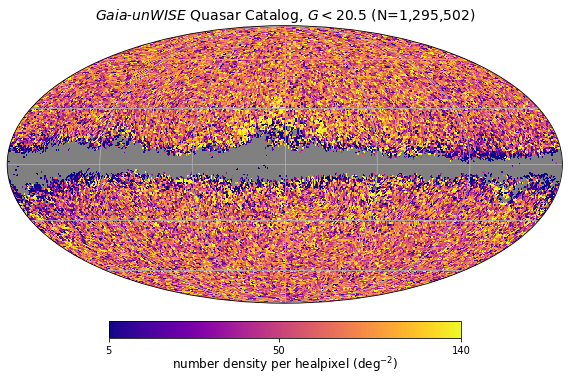

In [41]:
title_gcathi = rf"{name_catalog}, $G<{G_hi}$ (N={len(tab_gcathi):,})"
projview(map_selfunc_hi, title=title_gcathi,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.nanmedian(map_selfunc_hi)-fac_stdev*np.nanstd(map_selfunc_hi), max=np.nanmedian(map_selfunc_hi)+fac_stdev*np.nanstd(map_selfunc_hi), 
            norm='log', graticule=True,
            cbar_ticks=[5, 50, 140]) 

### Now random catalog

In [42]:
map_randselfunc_lo = map_randlo/selfunc_lo

<ipython-input-42-8958bc3fcfda>:1: RuntimeWarning: invalid value encountered in true_divide
  map_randselfunc_lo = map_randlo/selfunc_lo


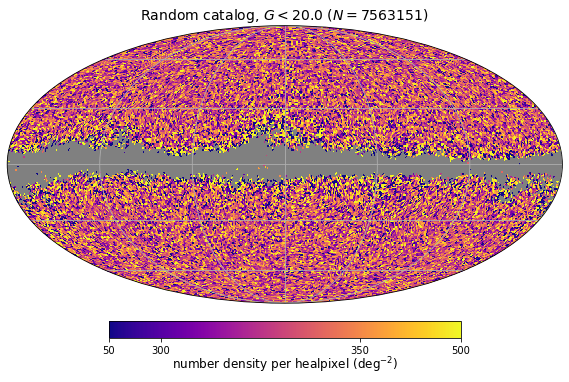

In [43]:
projview(map_randselfunc_lo, title=rf"Random catalog, $G<{G_lo}$ ($N={N_randlo}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.nanmedian(map_randselfunc_lo)-fac_stdev*np.nanstd(map_randselfunc_lo), 
            max=np.nanmedian(map_randselfunc_lo)+fac_stdev*np.nanstd(map_randselfunc_lo), 
            norm='log', graticule=True,
            cbar_ticks=[50, 300, 350, 500]) 

In [44]:
map_randselfunc_hi = map_randhi/selfunc_hi

<ipython-input-44-cd4f1c307f04>:1: RuntimeWarning: invalid value encountered in true_divide
  map_randselfunc_hi = map_randhi/selfunc_hi


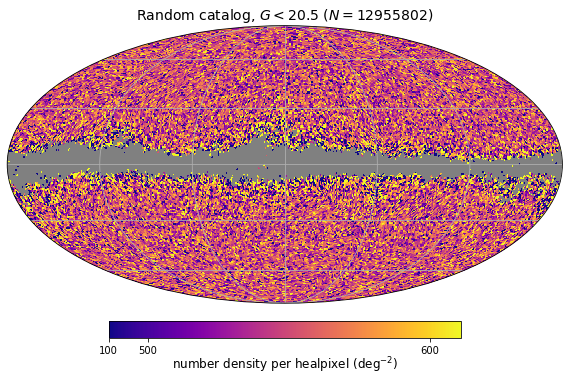

In [45]:
projview(map_randselfunc_hi, title=rf"Random catalog, $G<{G_hi}$ ($N={N_randhi}$)",
         unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
         min=np.nanmedian(map_randselfunc_hi)-fac_stdev*np.nanstd(map_randselfunc_hi), 
         max=np.nanmedian(map_randselfunc_hi)+fac_stdev*np.nanstd(map_randselfunc_hi), norm='log', graticule=True, 
         cbar_ticks=[100, 500, 600]) 

# Compute the projected angular auto-power spectrum
## First measure the pair counts

In [46]:
# Create the bins array
rmin = 0.5 # 0.1 # start higher
rmax = 60.0 # 20.0 
nbins = 20 
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1) # Mpc/h https://github.com/manodeep/Corrfunc/issues/202

In [47]:
pimax = 40.0

In [48]:
h = 0.6844
H0 = h*100 * u.km/u.s/u.Mpc

In [49]:
def Mpc_h(comoving_d):
    return (comoving_d*cu.littleh).to(u.Mpc, cu.with_H0(H0))/cu.littleh # equivalent to comoving_d*0.7

In [50]:
def comoving_dist(z, H0=H0): # col 2 in fig 7 of https://arxiv.org/pdf/1807.06209
    
    # H0 = h*100 * u.km/u.s/u.Mpc
    
    # obtain r: The comoving distance along the line-of-sight between two objects remains constant with time for objects in the Hubble flow.
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.302)
    comoving_d = cosmo.comoving_distance(z)

    return Mpc_h(comoving_d)

In [51]:
z_d = Mpc_h((constants.c*u.m/u.s* tab_gcatlo['redshift_quaia']/H0).to('Mpc'))

In [52]:
ind = np.argsort(tab_gcatlo['redshift_quaia'])

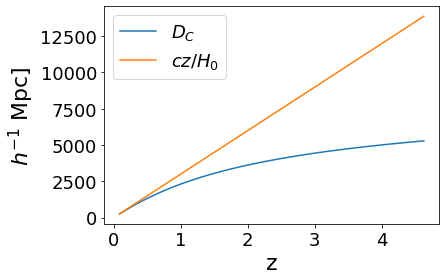

In [53]:
plt.plot(tab_gcatlo['redshift_quaia'][ind], comoving_dist(tab_gcatlo['redshift_quaia'])[ind], label = '$D_C$')
plt.plot(tab_gcatlo['redshift_quaia'][ind], z_d[ind], label = '$cz/H_0$')
plt.xlabel('z')
plt.ylabel('$h^{-1}$ Mpc]')
plt.legend()
plt.show()

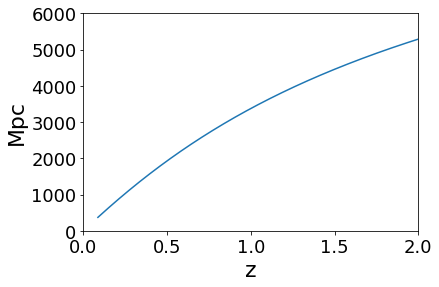

In [54]:
plt.plot(tab_gcatlo['redshift_quaia'][ind], comoving_dist(tab_gcatlo['redshift_quaia'][ind]).to(u.Mpc, cu.with_H0(H0)))
plt.xlabel('z')
plt.ylabel('Mpc')
plt.xlim(0, 2)
plt.ylim(0, 6000)
plt.show()

In [55]:
d_H = ((constants.c*u.m/u.s).to('km/s')/H0*cu.littleh).to(u.Mpc, cu.with_H0(H0))/cu.littleh
d_H

<Quantity 2997.92458 Mpc / littleh>

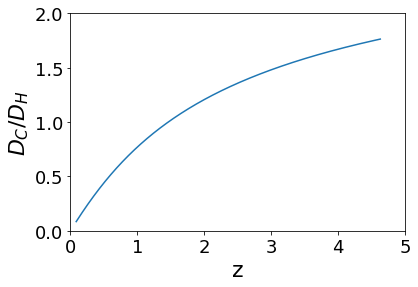

In [56]:
plt.plot(tab_gcatlo['redshift_quaia'][ind], comoving_dist(tab_gcatlo['redshift_quaia'][ind])/d_H)
plt.xlabel('z')
plt.ylabel('$D_C/D_H$')
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.show()

In [57]:
# comoving distance
DD_counts, api_time = mocks.DDrppi_mocks(autocorr = 1, cosmology = 2, nthreads = 8, pimax = pimax, binfile = rbins, 
                                         RA1 = tab_gcatlo['ra'], DEC1 = tab_gcatlo['dec'],  # where hubble distance = c/H0 and H0 = 100 km/s/Mpc h
                                         CZ1 = comoving_dist(tab_gcatlo['redshift_quaia']), weights1 = 1/selfunc_lo[pixel_indices_gcatlo],
                                         is_comoving_dist = True, weight_type='pair_product', output_rpavg = True, c_api_timer = True) # convert from Mpc to Mpc/h

np.save('../results/DD_counts_rmin{}_rmax{}_pimax{}_comoving_flat_sel_data'.format(str(rmin), str(rmax), str(pimax)), DD_counts)
api_time

/home/mshiferaw/.local/lib/python3.8/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


1.5160589999999998

## Generate a $z$ distribution for the random catalog
### Try interpolating the cdf so it's more smooth

In [58]:
# Compute the empirical cumulative distribution function (ECDF)
z = np.sort(tab_gcatlo['redshift_quaia'])
ecdf = np.arange(N_gcatlo) / (N_gcatlo - 1)

# Create an interpolation function for inverse transform sampling
inv_ecdf = interp.interp1d(ecdf, z) # have to interpolate, can't do binning method because each point --> cdf probability

# set random seed: https://builtin.com/data-science/numpy-random-seed
rng = np.random.default_rng(2023)

# Generate new random samples from the estimated distribution
tab_randlo['redshift_quaia'] = inv_ecdf(rng.uniform(size = N_randlo))

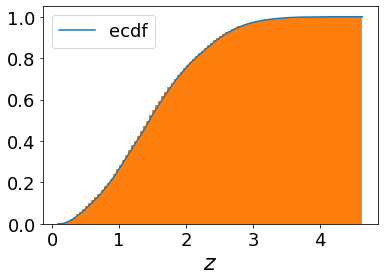

In [59]:
plt.plot(z, ecdf, label = 'ecdf')
plt.hist(tab_gcatlo['redshift_quaia'], cumulative = True, density = True, bins = 100)
plt.xlabel('$z$')
plt.legend()
plt.show()

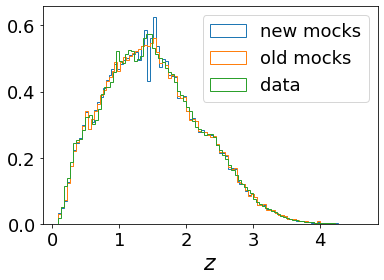

In [119]:
# plt.hist(tab_randlo['redshift_quaia'], histtype = 'step', density = True, label = 'randoms', bins = 100, linestyle = '--')
plt.hist(tab_gcatlo_new['redshift_quaia'], histtype = 'step', density = True, label = 'new mocks', bins = 100)
plt.hist(tab_gcatlo_old['redshift_quaia'], histtype = 'step', density = True, label = 'old mocks', bins = 100)
plt.hist(tab_gcatlo['redshift_quaia'], histtype = 'step', density = True, label = 'data', bins = 100)
plt.xlabel('$z$')
plt.legend()
plt.show()

### Now measure clustering in random catalog

In [62]:
d = 1

In [63]:
DR_counts, api_time = mocks.DDrppi_mocks(autocorr = 0, cosmology = 2, nthreads = 8, pimax = pimax, binfile = rbins, 
                                         RA1 = tab_gcatlo['ra'], DEC1 = tab_gcatlo['dec'], 
                                         CZ1 = comoving_dist(tab_gcatlo['redshift_quaia']), weights1 = 1/selfunc_lo[pixel_indices_gcatlo],
                                         RA2 = tab_randlo['ra'][::d], DEC2 = tab_randlo['dec'][::d],
                                         CZ2 = comoving_dist(tab_randlo['redshift_quaia'][::d]), 
                                         weights2 = 1/selfunc_lo[pixel_indices_randlo], weight_type='pair_product', 
                                         is_comoving_dist = True, output_rpavg = True, c_api_timer = True)

np.save('../results/DR_counts_rmin{}_rmax{}_pimax{}_comoving_flat_sel_data'.format(str(rmin), str(rmax), str(pimax)), DR_counts)
api_time

16.082011

In [64]:
RR_counts, api_time = mocks.DDrppi_mocks(autocorr = 1, cosmology = 2, nthreads = 8, pimax = pimax, binfile = rbins, 
                                         RA1 = tab_randlo['ra'][::d], DEC1 = tab_randlo['dec'][::d], 
                                         CZ1 = comoving_dist(tab_randlo['redshift_quaia'][::d]), 
                                         weights1 = 1/selfunc_lo[pixel_indices_randlo], weight_type='pair_product',
                                         is_comoving_dist = True, output_rpavg = True, c_api_timer = True)

np.save('../results/RR_counts_rmin{}_rmax{}_pimax{}_comoving_flat_sel_data'.format(str(rmin), str(rmax), str(pimax)), RR_counts)
api_time

14.90484

### Plot for sanity check

In [65]:
DD_counts['npairs'] = DD_counts['npairs']*DD_counts['weightavg']
DR_counts['npairs'] = DR_counts['npairs']*DR_counts['weightavg']
RR_counts['npairs'] = RR_counts['npairs']*RR_counts['weightavg']

In [66]:
def plot_counts(counts, key, cut, ax, x, label):
    
    pimax = counts[key]==cut
    ax.scatter(counts[x][pimax], counts['npairs'][pimax], label = label)

In [67]:
def recenter(bins):
    return 0.5*(bins[1:]+bins[:-1])

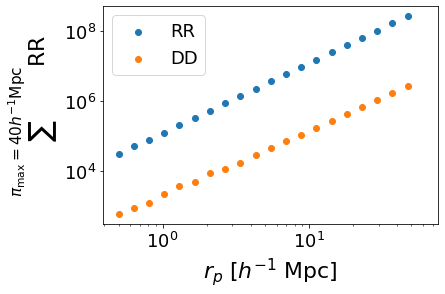

In [68]:
plt.scatter(rbins, [np.sum(RR_counts['npairs'][RR_counts['rmin']==i]) for i in rbins], label = 'RR')
plt.scatter(rbins, [np.sum(DD_counts['npairs'][DD_counts['rmin']==i]) for i in rbins], label = 'DD')
plt.xlabel(r'$r_{p}$ $[h^{-1}$ Mpc]') # projected
plt.ylabel('$\sum^{\pi_\mathrm{max}=40h^{-1}\mathrm{Mpc}}$RR')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

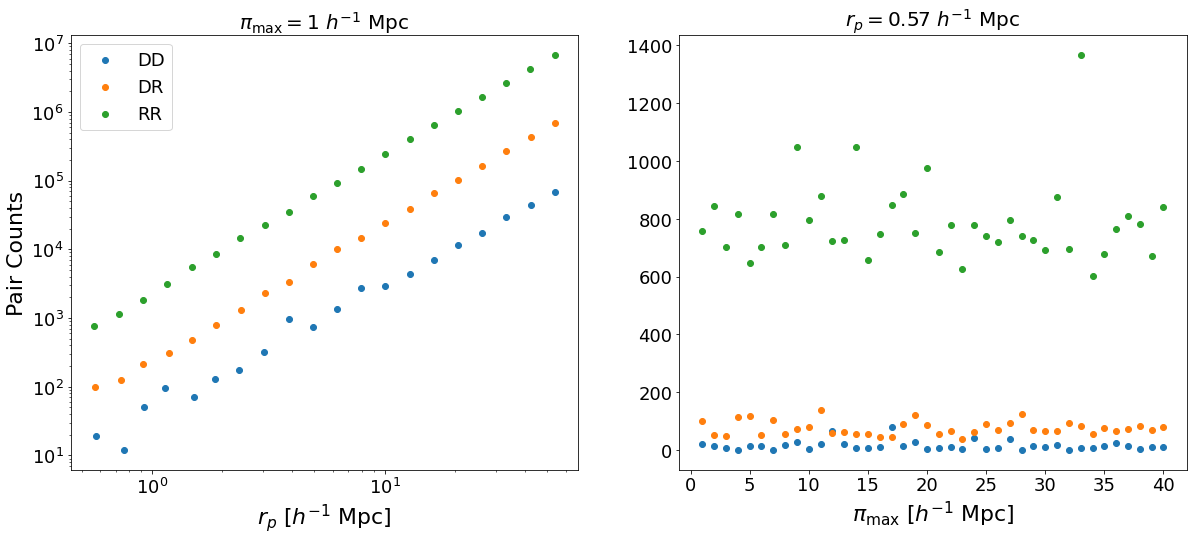

In [69]:
fig = plt.figure(figsize = (20, 8))
gs = gridspec.GridSpec(1, 2)

ax = fig.add_subplot(gs[0])
plot_counts(DD_counts, 'pimax', 1, ax, 'rpavg', 'DD')
plot_counts(DR_counts, 'pimax', 1, ax, 'rpavg', 'DR')
plot_counts(RR_counts, 'pimax', 1, ax, 'rpavg', 'RR')
ax.set_title('$\pi_\mathrm{max}=1$ $h^{-1}$ Mpc')
ax.set_xlabel(r'$r_{p}$ $[h^{-1}$ Mpc]') # projected
ax.set_ylabel("Pair Counts")
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax = fig.add_subplot(gs[1])
plot_counts(DD_counts, 'rmin', rbins[0], ax, 'pimax', 'DD')
plot_counts(DR_counts, 'rmin', rbins[0], ax, 'pimax', 'DR')
plot_counts(RR_counts, 'rmin', rbins[0], ax, 'pimax', 'RR')
ax.set_title(r'$r_{{p}}={:.2f}$ $h^{{-1}}$ Mpc'.format(recenter(rbins)[0]))
ax.set_xlabel('$\pi_{\mathrm{max}}$ $[h^{-1}$ Mpc]') # line of sight
# ax.set_yscale('log')
plt.show()

### Now convert the 2-D Pair counts into a $w_p(r_p)$


In [70]:
# All the pair counts are done, get the angular correlation function
wp = convert_rp_pi_counts_to_wp(N_gcatlo, N_gcatlo, int(N_randlo/d), int(N_randlo/d),
                                DD_counts, DR_counts, DR_counts, RR_counts, nbins, pimax)

np.save('../results/wp_rmin{}_rmax{}_pimax{}_comoving_flat_sel_rpavg_data'.format(str(rmin), str(rmax), str(pimax)), wp)

In [80]:
wp_curved = np.load('../results/wp_rmin{}_rmax{}_pimax{}_comoving.npy'.format(str(rmin), str(rmax), str(pimax)))
wp_curved_sel = np.load('../results/wp_rmin{}_rmax{}_pimax{}_comoving_flat_sel_rpavg_mocks.npy'.format(str(rmin), str(rmax), str(pimax)))
wp_curved_sel_rpavg = np.load('../results/wp_rmin{}_rmax{}_pimax{}_comoving_flat_sel_rpavg.npy'.format(str(rmin), str(rmax), str(pimax)))

In [88]:
# calculate the x axis
rpavg = [np.sum((DD_counts['rpavg']*DD_counts['npairs'])[DD_counts['rmin']==i])/np.sum(DD_counts['npairs'][DD_counts['rmin']==i]) 
         for i in rbins[:-1]]
np.save('../results/rpavg_data', rpavg)

In [89]:
rpavg_new = np.load('../results/rpavg_mocks.npy')
rpavg_old = np.load('../results/rpavg.npy')

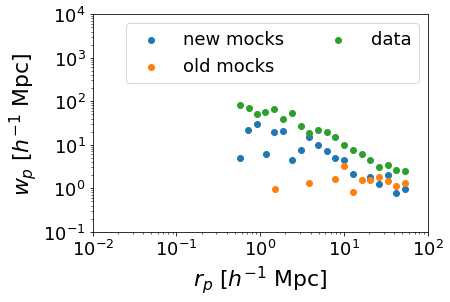

In [92]:
plt.scatter(rpavg_new, wp_curved_sel, label = 'new mocks')
plt.scatter(rpavg_old, wp_curved_sel_rpavg, label = 'old mocks')
plt.scatter(rpavg, wp, label = 'data')
plt.xlabel(r'$r_{p}$ $[h^{-1}$ Mpc]') # projected
plt.ylabel("$w_p$ $[h^{-1}$ Mpc]")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,1e2)
plt.ylim(1e-1,1e4)
plt.legend(ncol = 2)
plt.show()

### Try plotting $w_p/r_p$

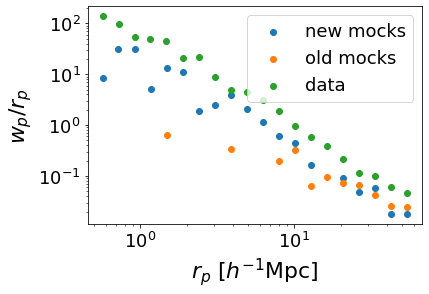

In [123]:
plt.scatter(rpavg_new, wp_curved_sel/rpavg_new, label = 'new mocks')
plt.scatter(rpavg_old, wp_curved_sel_rpavg/rpavg_old, label = 'old mocks')
plt.scatter(rpavg, wp/rpavg, label = 'data')
plt.xlabel(r'$r_{p}$ $[h^{-1}$Mpc]') # projected
plt.ylabel(r"$w_p/r_p$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-2,1e2)
# plt.ylim(1e-1,1e4)
plt.legend()
plt.show()